# Affective Computing - Programming Assignment 2

### Objective

Your task is to extract a set of prosodic correlates (i.e. suprasegmental speech parameters) and cepstral features from speech recordings. Then, an emotion recognition system is constructed to recognize happy versus sad emotional speech (a quite easy two class problem) using a simple supervised classifier training and testing structure.

The original speech data is a set of simulated emotional speech (i.e. acted) from ten speakers speaking five different pre-segmented sentences of roughly 2-3 seconds in two different emotional states (happy and sad) totaling 100 samples.
Basic prosodic features (i.e. distribution parameters derived from the prosodic correlates) are extracted using a simple voiced/unvoiced analysis of speech, pitch tracker, and energy analysis. Another set of Mel-Frequency Cepstral Coefficients (MFCC) features are also calculated for comparison.

Support Vector Machine (SVM) classifiers are trained. A random subset of 1/2 of the available speech data (i.e. half of the persons) is used to train the emotion recognition system, first using a set of simple prosodic parameter features and a then a classical set of MFCC derived features. The rest of the data (the other half of the persons) is then used to evaluate the performances of the trained recognition systems.

<!--### Implementation
<!---The data and toolbox files used in this exercise are:
Study the toolbox functions (e.g. ‘getF0’, ‘melcepst’) and the generic MATLAB functions (e.g. ‘hamming’, ‘conv’, ‘resample’, ‘filter’, ‘mean’, ‘std’, ‘prctile’, ‘kurtosis’, ‘sum’, ‘length’, ‘linspace’, ‘trainsvm’, ‘svmclassify’, and ‘confusionmat’) as they are needed in the exercise.-->

<!--Nine dictionaries are stored in the provided data file:-->

<!--* speech_sample
* testing_class
* testing_data_mfcc
* testing_data_proso
* testing_personID
* training_class
* training_data_mfcc
* training_data_proso
* training_personID -->

<!--To access one dictionary, using [`scipy.io`](https://docs.scipy.org/doc/scipy/reference/io.html) library for example: scipy.io.loadmat('filePath')['dictoionaryName']. **speech_sample** is used in the feature extraction part and the pre-extracted features in the emotion recognition part of this lab are **testing_class**, **testing_data_mfcc**, **testing_personID**, **training_class**, **training_data_mfcc**, **training_data_proso**, **training_personID**.-->


## Task 0. Preparation
Downsample the ‘speech_sample’ from the original Fs of 48 kHz to 11.025 kHz using [`scipy.signal.resample()`](https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.signal.resample.html) function.

**Steps**:
1. Load the data 'speech_sample' from file *lab2_data.mat*. Make sure the sample is a 1-D time series by reshaping it.
2. Declare the sampling frequency of the original signal, and the new sampling frequency.
3. Resample the signal using [`scipy.signal.resample()`](https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.signal.resample.html).
4. Visualize the resampled signal in the time domain. Use an appropriate time vector as the x-axis.

<!--### Task 0.1. Load Data
Load the ‘speech_sample’ from the provided dataset containing a raw speech waveform and do the following (Note, the sampling rate (fs) of the sample speech signal is 48 kHz):-->

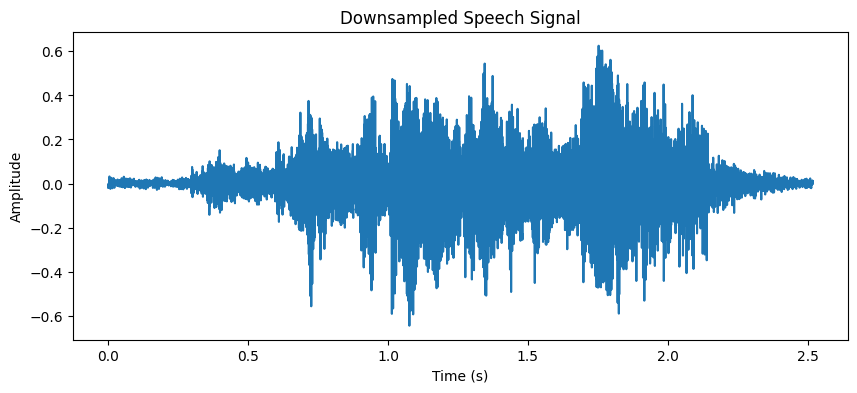

In [2]:
import numpy as np
import scipy.io as sio
from scipy import signal
import matplotlib.pyplot as plt

# 1. Load the 'speech_sample'
exercise_data = sio.loadmat('lab2_data.mat')#TODO
speech_sample = exercise_data['speech_sample'].reshape(-1)


# 2. Declare the source sampling frequency, and the target sampling frequency.
#    2.1 Source sampling frequency
fs_source = 48000  #TODO

#    2.2 Target sampling frequency
# Target frequency
fs_down = 11025 #TODO

# 3. Downsample the speech sample
speech_resampled = signal.resample(speech_sample, int(len(speech_sample) * fs_down / fs_source)) # TODO


# 4. Visualize the downsampled speech signal in the time domain.
#    4.1 Create the corresponding time vector, whose length is the same as the length of the given signal.
#        Use either np.linspace() or np.arange()
time_vector = np.arange(len(speech_resampled)) / fs_down

#    4.2 Plot your result
plt.figure(figsize=(10, 4))
plt.plot(time_vector, speech_resampled)
plt.title('Downsampled Speech Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


## Task 1. Feature Extraction

### Task 1.1 MFCC calculations using the provided sample speech signal.

**Steps**:
1. Pre-emphasize the resampled signal by applying a high pass filter, using the [`scipy.signal.lfilter()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html) function.
   Apply a pre-emphasis filter $ H(z) = 1- \alpha z^{-1} $ with $\alpha = 0.98$ to emphasize higher frequencies in your downsampled speech signal (Tip: use [`scipy.signal.lfilter`](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.signal.lfilter.html)).
   
   Hint for defining the filter: you will provide two vectors **b** and **a** to define the filter, **a** for the denominator and **b** for the numerator. So finally your filter will be defined as $$H(z) = \frac{b[0] z^0 + b[1] z^{-1} + ... + b[i] z^{-i}+...}{a[0] z^0 + a[1] z^{-1} + ... + a[i] z^{-i}+...}$$
2. Extract the 12 mfcc coefficients by using the [`python_speech_features.mfcc()`](http://python-speech-features.readthedocs.io/en/latest/) function.
    1. **The [`python_speech_features.mfcc()`](http://python-speech-features.readthedocs.io/en/latest/) function has an internal pre-emphasis functionality. However, we calculate the pre-emphasis by hand in order to have a better understanding of it, and thus it should be set to 0**
3. Visualize the 12 mfcc coefficient contours.
4. Calculate the mean of each contour using [`numpy.mean(axis=axis)`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html).

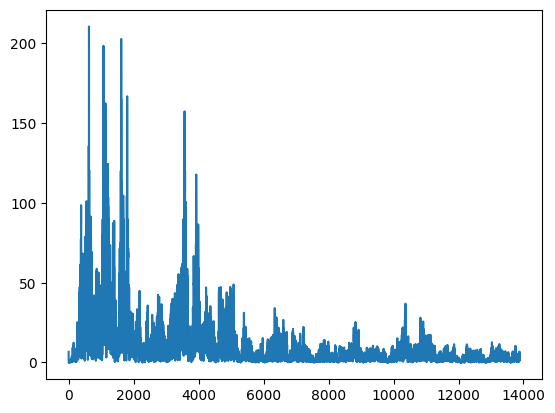

In [3]:
from scipy.fftpack import fft
plt.plot(abs(fft(speech_resampled))[:int(len(speech_resampled)/2)])

In [4]:
pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5870 sha256=2bd4fbb878c4a7739954faff3e5309b3516fa599af0723b08f8c9b9e6f4bbd1f
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


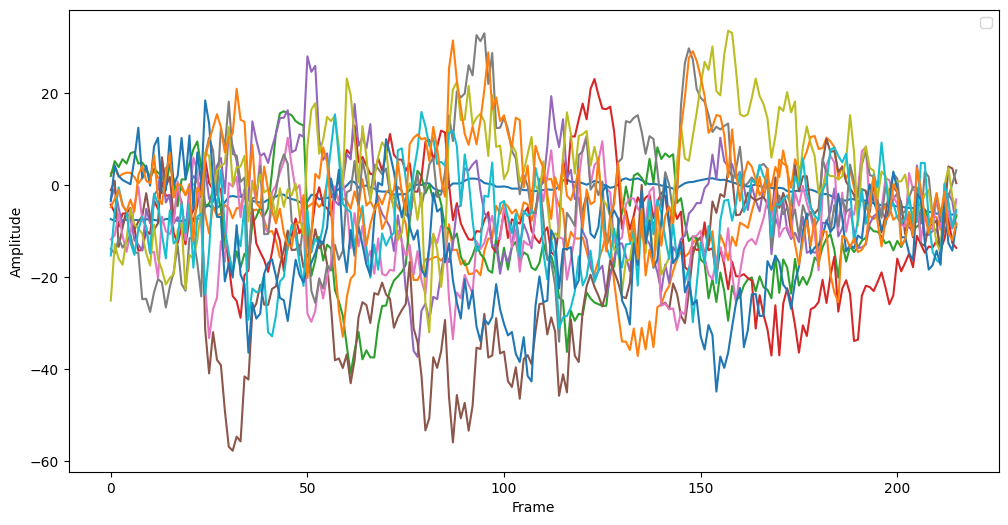

[ -2.17031911  -7.57536788 -11.54300249  -9.23687878  -5.0647505
 -19.07163611  -9.45254527  -0.95624205   1.60418387  -7.87867908
 -13.98430176  -0.68474208]


In [5]:
from scipy.signal import lfilter
from python_speech_features import mfcc
# 1. Pre-emphasize the resampled signal.
#    1.1 Define the polynomials of the fitler
#        filter coefficients b, which is the numerator
#        filter coefficients a, which is the denominator
a = [1]
b = [1, -0.98]

#    1.2 Apply the filter on the signal
pre_emphasized_sample = lfilter(b, a, speech_resampled) # TODO

# 2. Extract the mfcc coefficients by using the mfcc() function
     # remeber to set the pre-emphasize argument to 0 since the signal has been pre-emphasized already.
frame_len = int(2 ** np.floor(np.log2(0.03 * fs_down)))
mfcc_contour = mfcc(pre_emphasized_sample,
                   fs_down,
                   winlen = frame_len / fs_down,
                   winstep = frame_len / (2 * fs_down),
                   numcep = 12,
                   preemph = 0)

# 3. Plot the 12 mfcc contours
plt.figure(figsize=(12, 6))
for i in range(12):
    plt.plot(mfcc_contour[:, i])

plt.xlabel('Frame')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# 4. Calculate the mean for each contour.
mfcc_means = np.mean(mfcc_contour, axis=0)
print(mfcc_means)

### Question 1. Why do we need to pre-emphasize the speech signal before computing the MFCC feature?

### Your answer:

Pre-emphasis is a crucial preprocessing step in MFCC feature extraction. It enhances the quality of the speech signal representation, improves its robustness in noisy environments, and ensures numerical stability during subsequent processing, ultimately leading to more effective speech analysis and recognition

### Task 1.2 Extract the Intensity/Energy parameter
Firstly, calculate the short time energy (STE) of the downsampled ‘speech_sample’ using the squared signal $x(t)^2$ and a 0.01s hamming window frames (Note! the extra length of the window. Clip half a window length from the beginning and at the end). Then calculate the 5 distribution parameter features specified below from the utterance (the signal).


**Steps**:
1. Define a hamming window using the [`scipy.signal.hamming()`](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.signal.hamming.html) function. The window length is the number of frames in 0.01s.

2. Apply the hamming window to convolve the squared signal, using the [`scipy.signal.convolve()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html) function. The convolution result is the short time energy (STE) controu.
3. Clip half window of frames from the begining and ending of STE contour.
4. Visualize the resulted STE controur.
5. Calculating the following 5 distribution parameter feature from the STE contour:
    1. Mean, using the [`numpy.mean(https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.mean.html)`]() function.
    2. Standard Deviation (SD), using the [`numpy.std()`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.std.html) function.
    3. 10% percentile, using the [`numpy.percentile()`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.percentile.html) function.
    4. 90% percentile, using the [`numpy.percentile()`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.percentile.html) function.
    5. Kurtosis, using the [`scipy.stats.kurtosis()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html) function.


In [7]:
pip install hamming

  Preparing metadata (setup.py) ... done
  Created wheel for hamming: filename=hamming-0.0.4-py3-none-any.whl size=3169 sha256=f1b099a86d3629f96f32d5c50d34525f48328961f44874d86a873cf8699b02f8
  Stored in directory: /root/.cache/pip/wheels/20/a2/a5/210d9233f18ca7c638d8b1a282e35b8de71b2de5c8722f5bae
Successfully built hamming


<ipython-input-6-0321bf290395>:8: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  hamming_window = hamming(hamming_length)


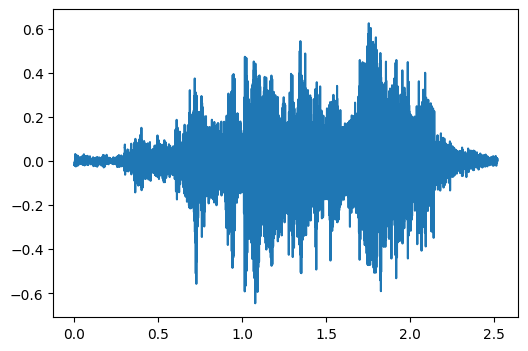

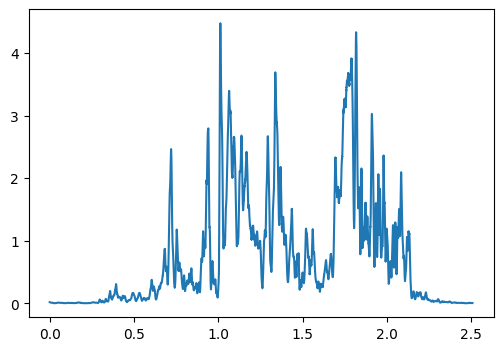

Mean: 0.7508120224551259
Standard Deviation: 0.905940754901257
10th Percentile: 0.007493424517934658
90th Percentile: 2.0840626079393414
Kurtosis: 1.9231298298135098


In [6]:
from scipy.stats import kurtosis
from scipy.signal import hamming
# 1. Define a hamming window
#    1.1 Calculate the window length, which is the number of frames within 0.01s
hamming_length = int(0.01 * fs_down)

#    1.2 Define the hamming window using signal.hamming()
hamming_window = hamming(hamming_length)


# 2. Calculate the short time energy (STE) contour by convolving the hamming window and the squared signal,
#    using the scipy.signal.convolve() function
squared_signal = speech_resampled**2
ste = np.convolve(squared_signal, hamming_window, mode='same')


# 3. Clip half a window of frames from both the beginning and end of the STE contour
ste = ste[int(hamming_length / 2):-int(hamming_length / 2) - 1]


# 4. Visualize the final STE contour.
#    4.1 Create the time vector for x-axis
time_vector_ste = np.arange(len(ste)) / fs_down
#    4.2 Visualize speech_resampled and the STE contour
plt.figure(figsize=(6, 4))
plt.plot(time_vector, speech_resampled)
plt.figure(figsize=(6, 4))
plt.plot(time_vector_ste, ste)
plt.show()

# 5. Calculate the 5 distribution parameter features the of STE contour
ste_mean = np.mean(ste)
ste_std = np.std(ste)
ste_10th_percentile = np.percentile(ste, 10)
ste_90th_percentile = np.percentile(ste, 90)
ste_kurtosis = kurtosis(ste)

# Print the calculated features
print("Mean:", ste_mean)
print("Standard Deviation:", ste_std)
print("10th Percentile:", ste_10th_percentile)
print("90th Percentile:", ste_90th_percentile)
print("Kurtosis:", ste_kurtosis)

### Question 2. Why do we need to clip out half a frame from both the beginning and the ending of the STE?

### Your answer:

In order to prevent mistakes brought on by the window's margins, the initial and last half frames of the STE contour should be removed. This is due to the windowing function's potential to induce signal distortion at the signal's borders, which might result in erroneous energy estimations. Calculations of energy are more precise as a result of clipping the edges, which eliminates the distorted signal.In a sentence, in order to eliminate the overlap of the signal, noise, and the initial portion of the signal, it is necessary to trim half a frame from both the beginning and the end of the Short Time Energy (STE) signal.

### Task 1.3. Extract the Pitch/F0 feature
**Steps**:
1. Extract the Pitch/F0 contour of the resampled speech signal using the **get_f0()** function in 0.01s frames. The function is provided in the *f0_lib.py* file.
2. Visualize the F0 contour.
3. Extract the 5 distribution parameter features of the extracted F0 countour.



In [7]:
import warnings
warnings.filterwarnings("ignore")

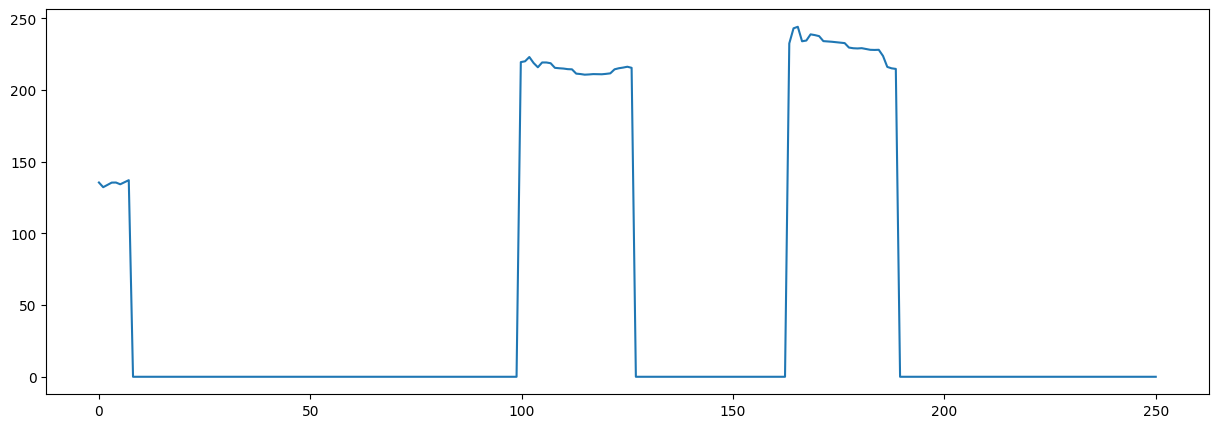

 Mean: 51.76644479473558
Standard Deviation: 92.16685962797015
10th Percentile: 0.0
90th Percentile: 219.60425158045447
Kurtosis: -0.32758005245094113


In [8]:
import numpy as np
import scipy.io as sio
import scipy
from f0_lib import get_f0
import matplotlib.pyplot as plt

# 1. Extract the F0 contour
f0, strength, T_ind, wflag = get_f0(speech_resampled,fs_down)

# 2. Visualize the F0 contour
time = np.linspace(0, 250, num=len(f0))

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
ax.plot(time, f0)
plt.show()

# 3. Calculate the 5 distribution parameter features of the F0 contour

mean_f0 = np.mean(f0)
std_f0 = np.std(f0)
per10_f0 = np.percentile(f0, 10)
per90_f0 = np.percentile(f0, 90)
kurtosis_f0 = kurtosis(f0)

# Print the calculated features
print(" Mean:", mean_f0)
print("Standard Deviation:", std_f0)
print("10th Percentile:", per10_f0)
print("90th Percentile:", per90_f0)
print("Kurtosis:", kurtosis_f0)


### Task 1.4. Extract the Rhythm/Durations parameter
**Steps**:
1. Perform a Voiced/Unvoiced speech segmentation of speech signal. Tip: Unvoiced frames are marked with 0 F0 values, you can find the voiced frames (i.e. F0 > 0) using [`numpy.where()`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.where.html).
2. From the segmentation, calculate the means and SDs of both Voiced and Unvoiced segment lengths (i.e. voiced segment mean length, SD of voiced segment lengths, unvoiced segment mean length, SD of unvoiced segment lengths).
3. Calculate also the voicing ratio, i.e. the ratio of voiced segments versus total segments (Tip: You can do this simply by using the frames).



In [11]:
# 1. Segmenting the voiced speech segements.
voiced_inds = np.where(f0 > 0)[0]
diff = voiced_inds[1:] - voiced_inds[: -1]
voiced_to_unvoiced_inds = np.where(diff > 1)[0]
voiced_seg_n = len(voiced_to_unvoiced_inds) + 1
voiced_seg_lengths = np.zeros(voiced_seg_n)
tmp = voiced_inds[0]

for i in range(voiced_seg_n - 1):
    voiced_seg_lengths[i] = voiced_inds[voiced_to_unvoiced_inds[i]] - tmp + 1
    tmp = voiced_inds[voiced_to_unvoiced_inds[i] + 1]

voiced_seg_lengths[-1] = voiced_inds[-1] - tmp + 1

######################################################
######################################################


# 2. Segmenting unvoiced speech segements.
unvoiced_inds = np.where(f0 <= 0)[0]
diff = unvoiced_inds[1:] - unvoiced_inds[: -1]
unvoiced_to_unvoiced_inds = np.where(diff > 1)[0]
unvoiced_seg_n = len(unvoiced_to_unvoiced_inds) + 1
unvoiced_seg_lengths = np.zeros(unvoiced_seg_n)
tmp = unvoiced_inds[0]

for i in range(unvoiced_seg_n - 1):
  unvoiced_seg_lengths[i] = unvoiced_inds[unvoiced_to_unvoiced_inds[i]] - tmp + 1
  tmp = unvoiced_inds[unvoiced_to_unvoiced_inds[i] + 1]

unvoiced_seg_lengths[-1] = unvoiced_inds[-1] - tmp + 1

# 3. Calculate the means and SDs of both Voiced and Unvoiced segment lengths
mean_voiced = np.mean(voiced_seg_lengths)
std_voiced = np.std(voiced_seg_lengths)
mean_unvoiced = np.mean(unvoiced_seg_lengths)
std_unvoiced = np.std(unvoiced_seg_lengths)

# 4. Calculate the voicing ratio.
voicing_ratio = np.sum(voiced_seg_lengths) / (np.sum(voiced_seg_lengths) + np.sum(unvoiced_seg_lengths))

# Print the calculated features
print("Features from F0: ")
print("Mean of voiced:", mean_voiced)
print("Std of voiced:", std_voiced)
print("Std of voiced:", mean_unvoiced)
print("Std of voiced:", std_unvoiced)
print("Voicing R]ratio:", voicing_ratio)

Features from F0: 
Mean of voiced: 20.333333333333332
Std of voiced: 8.73053390247253
Std of voiced: 62.666666666666664
Std of voiced: 22.48456260538674
Voicing R]ratio: 0.24497991967871485


### Question 3. What is the difference between voiced and unvoiced sounds? Give some examples of each.

### Your answer:

Voiced sounds are produced when the vocal cords vibrate. Unvoiced sounds are produced when the vocal cords do not vibrate.
Examples of voiced sound: Rain, Girl, yellow, zoo
Examples of unvoiced sound: table, ship, key, fish


## Task 2. Speech Emotion Classification

In this part, the [`sklearn.svm`](http://scikit-learn.org/stable/modules/svm.html) library is used to perform the speech signal classification. The **‘training_data_proso’** and **‘training_data_mfcc’** matrices contain the calculated prosodic features for the training set (9 features in each row representing a speech sample) and MFCC derived features (12 features) respectively. The **‘training_class’** group vector contains the class of samples: 1 = happy, 2 = sad; corresponding to the rows of the training data matrices.

<!---
Test the classifiers and plot confusion matrices.
* Use the ‘svmclassify’ function (and your trained SVM structures) to classify the ‘training_data_*’ and the ‘testing_data_*’ data matrices. Then, calculate average classification performances for both training and testing data. The correct class labels corresponding with the rows of the training and testing data matrices are in the variables ‘training_class’ and ‘testing_class’, respectively.
    * 	Calculate the average classification performances for the training data (‘training_data_proso’ and ‘training_data_mfcc’) using the corresponding prosody and MFCC trained SVMs.
    * 	Calculate the average classification performance for the testing data (‘testing_data_proso’ and testing_data_mfcc’) using the corresponding prosody and MFCC trained SVMs.
* Plot confusion matrices for the training and testing data for both classifiers. Tip, use ‘confusionmat’ function.-->



<!---speech_sample
testing_class
testing_data_mfcc
testing_data_proso
testing_personID
training_class
training_data_mfcc
training_data_proso
training_personID
### Task 2.1. Preparing your data
Dictionaries of the data are listed below:
* speech_sample
* testing_class
* testing_data_mfcc
* testing_data_proso
* testing_personID
* training_class
* training_data_mfcc
* training_data_proso
* training_personID
Use [`scipy.io.loadmat()`] to read the dataset.-->

### Task 2.1. Train the SVM classifiers
**Steps**:
1. Load the training data.
2. Train a SVM with the prosody data using the **‘training_data_proso’** features and a **3rd order polynomial** kernel.
3. Train a SVM with the MFCC data using the **‘training_data_mfcc’** features and a **3rd order polynomial** kernel.

In [13]:
# Initialize the SVM classifiers.
from sklearn import svm

# 1. Load data
exercise_data = sio.loadmat('lab2_data.mat')

#    1.1 Load 'training_data_proso'
training_data_proso = exercise_data['training_data_proso']

#    1.2 Load 'training_data_mfcc'
training_data_mfcc = exercise_data['training_data_mfcc']


#    1.3 Load 'training_class'
training_class = exercise_data['training_class'].reshape(-1)




# 2. Train a classifier using the prodosic data
#    2.1 Initialize a svm classifer

svm_proso = svm.SVC(kernel='poly', degree=3)
#    2.2 Train the classifier
svm_proso.fit(training_data_proso, training_class)


# 3. Train a classifer using the mfcc data
#    2.1 Initialize a svm classifer
svm_mfcc = svm.SVC(kernel='poly', degree=3)


#    2.2 Train the classifier
svm_mfcc.fit(training_data_mfcc, training_class)

SVC(kernel='poly')

### Task 2.2. Test the classifiers
Classify the **‘training_data_*’** and the **‘testing_data_*’** data matrices. Then, calculate average classification performances for both training and testing data. The correct class labels corresponding with the rows of the training and testing data matrices are in the variables ‘training_class’ and ‘testing_class’, respectively.

**Steps**:
1. Load the testing data.
2. Calculate the average classification accuracy for the training data (**‘training_data_proso’** and **‘training_data_mfcc’**) using the corresponding prosody and MFCC trained SVMs.
3. Calculate the average classification accuracy for the testing data (**‘testing_data_proso’** and **‘testing_data_mfcc’**) using the corresponding prosody and MFCC trained SVMs.
4. Print the four accuracies you have calculated.

In [15]:
# 1. Load testing data
from sklearn.metrics import accuracy_score
testing_data_mfcc = exercise_data['testing_data_mfcc']
testing_data_proso = exercise_data['testing_data_proso']
testing_class = exercise_data['testing_class'].reshape(-1)

# 2. Calculate the average classification performances for the training data
training_proso_pred = svm_proso.predict(training_data_proso)
avg_accuracy_training_proso = accuracy_score(training_class, training_proso_pred)
training_mfcc_pred = svm_mfcc.predict(training_data_mfcc)
avg_accuracy_training_mfcc = accuracy_score(training_class, training_mfcc_pred)

# 3. Calculate the average classification performance for the testing data
testing_proso_pred = svm_proso.predict(testing_data_proso)
avg_accuracy_testing_proso = accuracy_score(testing_class, testing_proso_pred)
testing_mfcc_pred = svm_mfcc.predict(testing_data_mfcc)
avg_accuracy_testing_mfcc = accuracy_score(testing_class, testing_mfcc_pred)

# 4. Print the four accuracies.
print("Average Classification Accuracy for Training Data (Prosody):", avg_accuracy_training_proso)
print("Average Classification Accuracy for Training Data (MFCC):", avg_accuracy_training_mfcc)
print("Average Classification Accuracy for Testing Data (Prosody):", avg_accuracy_testing_proso)
print("Average Classification Accuracy for Testing Data (MFCC):", avg_accuracy_testing_mfcc)

Average Classification Accuracy for Training Data (Prosody): 0.84
Average Classification Accuracy for Training Data (MFCC): 0.96
Average Classification Accuracy for Testing Data (Prosody): 0.62
Average Classification Accuracy for Testing Data (MFCC): 0.84


### Question 4. Which one of the extracted features performed better?

### Your answer:

The MFCC features achieved higher accuracy on both the training and testing data, indicating that they are more effective for this emotion recognition task compared to the prosody features.

### Task 2.3. Plot confusion matrices for the training and testing data for both classifiers.
Print following confusion matrix(Tip, use [`sklearn.metrics.confusion_matrix`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function):
* The confusion matrix of the prosody trained SVM using the **‘training_data_proso’**.
* The confusion matrix of the prosody trained SVM using the **‘testing_data_proso’**.
* The confusion matrix of the MFCC trained SVM using the **‘training_data_mfcc’**.
* The confusion matrix of the MFCC trained SVM using the **‘testing_data_mfcc’**.

In [21]:
from sklearn.metrics import confusion_matrix

confusion_proso_train = confusion_matrix(training_class, training_proso_pred)
print("Prosody - Training Data:\n", confusion_proso_train)

confusion_proso_test = confusion_matrix(testing_class, testing_proso_pred)
print("Prosody - Testing Data:\n", confusion_proso_test)

confusion_mfcc_train = confusion_matrix(training_class, training_mfcc_pred)
print("MFCC - Training Data:\n", confusion_mfcc_train)

confusion_mfcc_test = confusion_matrix(testing_class, testing_mfcc_pred)
print("MFCC - Testing Data:\n", confusion_mfcc_test)


Prosody - Training Data:
 [[17  8]
 [ 0 25]]
Prosody - Testing Data:
 [[ 9 16]
 [ 3 22]]
MFCC - Training Data:
 [[23  2]
 [ 0 25]]
MFCC - Testing Data:
 [[22  3]
 [ 5 20]]


### Question 5. What can you conclude from the confusion matrices?

### Your answer:

The MFCC-based classifier is more robust and performs better for this emotion recognition task compared to the Prosody-based classifier. Both classifiers have a higher true positive rate for the "Happy" class compared to the "Sad" class, indicating better recognition of happy emotional speech.
The Prosody-based classifier has more false positives for the "Sad" class, while the MFCC-based classifier has more false negatives for the "Happy" class, which suggests different error patterns between the two classifiers.


### Question 6. Can you proposed other classification metrics? Please give explanations of your proposed metrics.

### Your answer:

Beyond accuracy and confusion matrix, there are other classification measures that might offer a more thorough assessment of classifier performance.
1. **Precision** is determined by comparing the number of actual positive cases to the total number of anticipated positive ones. How many of the occurrences that were expected to be positive actually turned out to be so? is the question it answers.
2. **Recall** is a measure of how well a model can identify all of the positive instances in a dataset. It is calculated by dividing the number of true positives by the total number of actual positive instances. True positives are instances that are correctly predicted to be positive. False negatives are instances that are incorrectly predicted to be negative. Recall is also known as sensitivity.
3. **F1 score** is a measure of the overall performance of a model, taking into account both precision and recall. It is calculated by taking the harmonic mean of precision and recall.
4. **AUC-ROC** is a measure of how well a model can distinguish between positive and negative instances. It is calculated by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings and calculating the area under the curve. The AUC-ROC curve is a good way to visualize the performance of a model across a range of thresholds. A higher AUC-ROC indicates that the model is better able to distinguish between positive and negative instances.